### Use 05_drinking.csv to play around with Regression Discontinuity Design

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### a) Keeping 21 as the threshold for age, explore the data with an RDD by writing very simple code to determine if alcohol increases the chances of death by accident, suicide and/or others

In [2]:
# Overview of the dataset
drinking = pd.read_csv("drinking.csv")
drinking.head()

,age,others,accident,suicide
0,19.068493,92.825401,35.829327,11.203714
1,19.150684,95.100739,35.639256,12.193368
2,19.232876,92.144295,34.205650,11.715812
3,19.315069,88.427757,32.278957,11.275010
4,19.397261,88.704941,32.650967,10.984314


In [3]:
# Split the data into age ranging from 20 to 21 and from 21 to 22
below = drinking[(drinking["age"] >= 20) & (drinking["age"] < 21)]
above = drinking[(drinking["age"] >= 21) & (drinking["age"] < 22)]

In [4]:
# Calculate the expected value of observations lying closely to the threshold
acc_bl = below["accident"].mean()
acc_ab = above["accident"].mean()

sui_bl = below["suicide"].mean()
sui_ab = above["suicide"].mean()

oth_bl = below["others"].mean()
oth_ab = above["others"].mean()

RDD = pd.DataFrame({"Age from 20 to 21": [acc_bl, sui_bl, oth_bl],
                   "Age from 21 to 22": [acc_ab, sui_ab, oth_ab],
                   "Death by": ["Accident", "Suicide", "Others"]}).set_index("Death by")
RDD

,Age from 20 to 21,Age from 21 to 22
Death by,,
Accident,31.296563,32.635049
Suicide,11.642920,13.361998
Others,93.318850,99.860510


From the RDD result table above, the expected chances of death by accident, suicide, and others all increase as one's age goes across 21, which is the legal age for drinking. It implies that legalizing drinking may cause increase in chances of death by accident, suicide, and others. Therefore, we should not reduce the legal age for drinking from 21 because of the negative effect of alcohol and that younger people may be more influenced by the bad effect.

#### b) Plot graphs to show the discontinuity (if any) and to show results for the change in chances of death with all the three features

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

// Disable scrolling to show the plot without a scrollbar

<IPython.core.display.Javascript object>

In [28]:
def plot_RDD(below, above, bandwidth):
    '''Draw the discrete relationship plots between age and (accident, suicide, and others)'''
    # Specify the plot size
    plt.figure(figsize=(11,3))

     # Determine the variables of interest
    variables = ['accident','suicide','others']
    
    # Plot the graphs side by side
    i = 1
    for var in variables:
        plt.subplot(1,3,i)
        g = sns.scatterplot(x = "age", y = var, data = drinking)
        g.axvline(21, color = "grey", linestyle='dashed')
        g.set(title = f"{var.title()} vs. Age")
        g.axhline(y=below[var].mean(), xmin=0, xmax=0.5, color="blue")
        g.axhline(y=above[var].mean(), xmin=0.5, xmax=1, color="orange")
        g.set(xlim = (21-bandwidth, 21+bandwidth))
        i+=1

In [29]:
def plot_RDD_lm(below, above, bandwidth):
    '''Draw the continuous relationship plots between age and (accident, suicide, and others)'''
    # Specify the plot size
    plt.figure(figsize=(11,3))
    
    # Determine the variables of interest
    variables = ['accident','suicide','others']
    
    # Plot the graphs side by side
    i = 1
    for var in variables:
        plt.subplot(1,3,i)
        g = sns.scatterplot(x = "age", y = var, data = drinking)
        g.axvline(21, color = "grey", linestyle='dashed')
        g.set(title = f"{var.title()} vs. Age")
        sns.regplot(x="age", y=var, data=below)
        sns.regplot(x="age", y=var, data=above)
        g.set(xlim = (21-bandwidth, 21+bandwidth))
        i+=1

#### c) What might be the effect of choosing a smaller bandwidth?  What if we chose the maximum bandwidth?

1. Choosing a smaller bandwidth is theoretically more accurate. However, in this case, one thing to note is that not everyone just begins to drink from exactly their 21st birthday. Some people may drink slightly before 21st birthday, which is illegal obviously but it does happen, and some people may not drink right after their 21st birthday (they may try alcohol after 22 or later). Therefore, in this scenario, choosing a tight investigation width may amplify the contamination among data. Besides, since the amount of observations is limited, the result of a smaller bandwidth with fewer observations may not be reliable.
2. Choosing a larger bandwidth (the max bandwidth) would let confounders into the play. For example, the rate of death by accident, suicide, or others may inherently decrease or increase because of people's mental growth or even physical state. So drinking may not be the only reason that accounts for the difference between expected death rates. It may even flip the estimated causal effect and we should avoid this.

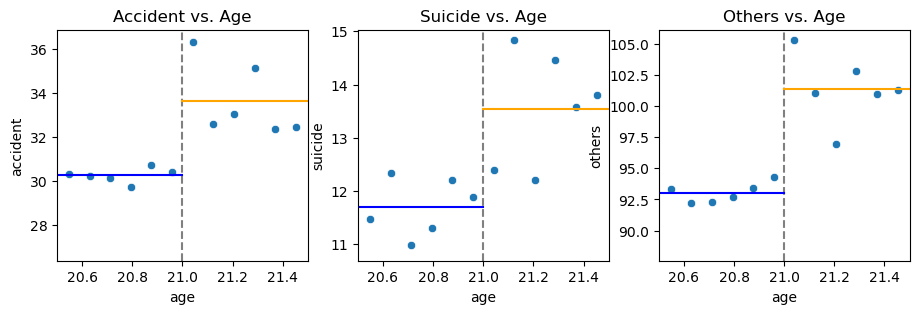

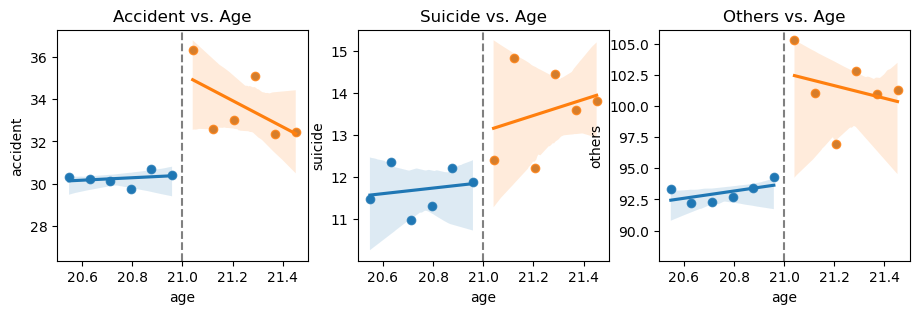

In [30]:
# Choose a smaller bandwidth (0.5 year)
below_s = drinking[(drinking["age"] >= 20.5) & (drinking["age"] < 21)]
above_s = drinking[(drinking["age"] >= 21) & (drinking["age"] < 21.5)]

# Plot the new relationships
plot_RDD(below_s, above_s, 0.5)
plot_RDD_lm(below_s, above_s, 0.5)

A smaller bandwidth leads to the same results with even larger differences in death rate.

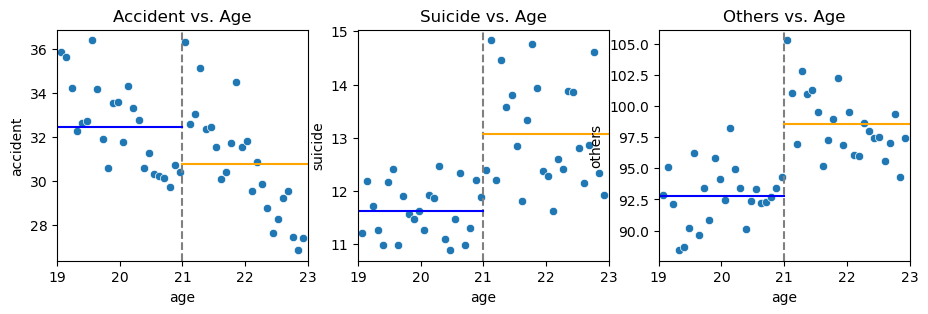

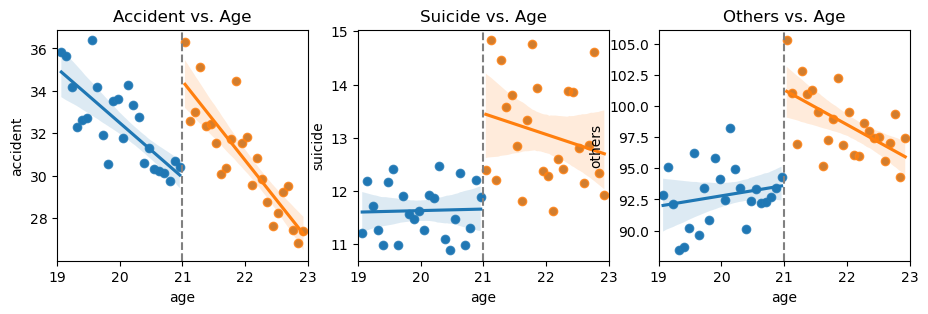

In [31]:
# Choose the max bandwidth (2 year)
below_m = drinking[(drinking["age"] >= 19) & (drinking["age"] < 21)]
above_m = drinking[(drinking["age"] >= 21) & (drinking["age"] < 23)]

# Plot the new relationships
plot_RDD(below_m, above_m, 2)
plot_RDD_lm(below_m, above_m, 2)

The max bandwidth leads to a flipped result - the chance of death by accident appears higher before 21 than after. It may be because younger people are less capable of protecting themselves and their body may not be as strong on average, and it is apparently not because they don't drink.